In [1]:
def get_accuracies(class_sep):

    pea_list_accuracies = []
    ml_list_accuracies = []
    
    number_of_samples = 1000
    number_of_features = 26
    number_informative_features = 5
    number_redundant_features = 21
    number_repeated_features = 0
    number_classes = 3
    number_clusters_per_class = 1
    class_separator = class_sep
    flip_y = 0
    weights = [0.5, 0.5, 0.5]

    X_train, X_test, y_train, y_test = helper_data_generator.get_make_classification_data(
                                                      number_of_samples,
                                                      number_of_features,
                                                      number_informative_features,
                                                      number_redundant_features,
                                                      number_repeated_features,
                                                      number_classes,
                                                      number_clusters_per_class,
                                                      class_separator,
                                                      flip_y,
                                                      weights)
    X_train, X_test = helper_data_generator.get_scaled_data(X_train, X_test)
    pea_list_accuracies = helper_data_generator.train_test_classifier_print_results(classifier_list[0], pea_list_accuracies, X_train, X_test, y_train, y_test)
    ml_list_accuracies = helper_data_generator.train_test_classifier_print_results(classifier_list[1], ml_list_accuracies, X_train, X_test, y_train, y_test)

    return pea_list_accuracies[0], ml_list_accuracies[0]

def train_test_classifier_print_results(clf, list_accuracies, X_train, X_test, y_train, y_test):
    # print(clf.__class__.__name__)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    # cm = confusion_matrix(y_test, prediction)
    # print("confusion_matrix")
    # print(cm)
    # print("")

    correct_rate = accuracy_score(y_test, prediction)
    correct_count = accuracy_score(y_test, prediction, normalize=False)
    #print(correct_rate,correct_count)
    list_accuracies.append(correct_rate)
    
    return list_accuracies
    # print(f"correct rate: {correct_rate}")
    # print(f"correct count: {correct_count}")


classifier_list = [
     PerformanceEnrichmentAnalysisClassifier(
        number_of_clusters=20, permutations=100),
     KNeighborsClassifier(3),
     # SVC(kernel="linear", C=0.025)
     SVC(gamma=2, C=1),
     DecisionTreeClassifier(max_depth=5),
     # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
     # MLPClassifier(alpha=0.01),
     AdaBoostClassifier(),
     # GaussianNB(),
     # QuadraticDiscriminantAnalysis()
]


NameError: name 'PerformanceEnrichmentAnalysisClassifier' is not defined

In [2]:
classifier_list = [
     PerformanceEnrichmentAnalysisClassifier(
        number_of_clusters=20, permutations=100),
     KNeighborsClassifier(3),
     SVC(kernel="linear", C=0.025),
     # SVC(gamma=2, C=1),
     DecisionTreeClassifier(max_depth=5),
     # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
     # MLPClassifier(alpha=0.01),
     AdaBoostClassifier(),
     # GaussianNB(),
     # QuadraticDiscriminantAnalysis()
]

def get_accuracies(classifier_list, class_sep=None, noise=None, cluster_per_class=None):

    default_class_separator = 0
    default_noise = 0
    def_cluster_per_class = 1
    pea_list_accuracies = []
    ml_list_accuracies = []
    svm_list_accuracies = []
    dt_list_accuracies = []
    ada_list_accuracies = []
    
    if class_sep is None:
        class_separator = default_class_separator
    else:
        class_separator = class_sep

    if noise is None:
        flip_y = default_noise
    else:
        flip_y = noise
        
    if cluster_per_class is None:
        number_clusters_per_class = def_cluster_per_class
    else:
        number_clusters_per_class = cluster_per_class
    
    # Default Feature arguments
    number_of_samples = 1000
    number_of_features = 26
    number_informative_features = 5
    number_redundant_features = 21
    number_repeated_features = 0
    number_classes = 3
    number_clusters_per_class = 1

    # Variable arguments
    weights = [0.64, 0.34, 0.2]

    X_train, X_test, y_train, y_test = helper_data_generator.get_make_classification_data(
                                                number_of_samples,
                                                number_of_features,
                                                number_informative_features,
                                                number_redundant_features,
                                                number_repeated_features,
                                                number_classes,
                                                number_clusters_per_class,
                                                class_separator,
                                                flip_y,
                                                weights)
    
    X_train, X_test = helper_data_generator.get_scaled_data(X_train, X_test)
    pea_list_accuracies = helper_data_generator.train_test_classifier_print_results(classifier_list[0], pea_list_accuracies, X_train, X_test, y_train, y_test)
    knn_list_accuracies = helper_data_generator.train_test_classifier_print_results(classifier_list[1], ml_list_accuracies, X_train, X_test, y_train, y_test)
    svm_list_accuracies = helper_data_generator.train_test_classifier_print_results(classifier_list[2], svm_list_accuracies, X_train, X_test, y_train, y_test)
    dt_list_accuracies = helper_data_generator.train_test_classifier_print_results(classifier_list[3], dt_list_accuracies, X_train, X_test, y_train, y_test)
    ada_list_accuracies = helper_data_generator.train_test_classifier_print_results(classifier_list[4], ada_list_accuracies, X_train, X_test, y_train, y_test)
    
    return pea_list_accuracies[0], ml_list_accuracies[0], svm_list_accuracies[0], dt_list_accuracies[0], ada_list_accuracies[0]


In [247]:
list_noise_vals = list(np.round(np.arange(0,2.9,0.1),2))
list_1 = [get_accuracies(classifier_list, noise = noise_level) for noise_level in list_noise_vals]
x, y, z, m, n = np.array(list_1).T

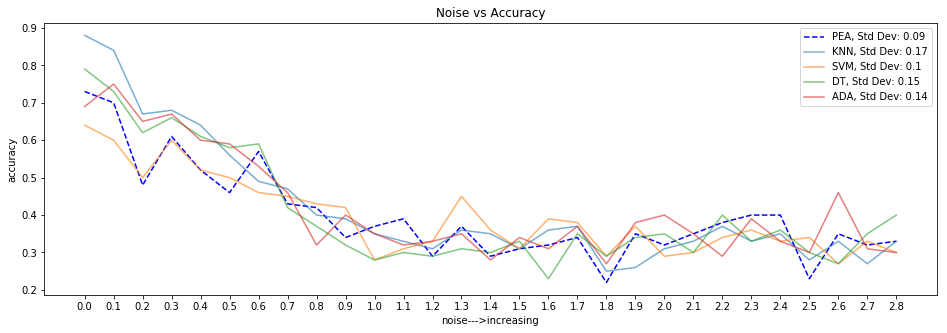

In [248]:
plt.figure(figsize=(16,5))
plt.plot(list_noise_vals,x,'b--',label='PEA, Std Dev: '+str(np.round(np.std(x),2)))
plt.plot(list_noise_vals,y,label='KNN, Std Dev: '+str(np.round(np.std(y),2)), alpha = 0.6)
plt.plot(list_noise_vals,z,label='SVM, Std Dev: '+str(np.round(np.std(z),2)), alpha = 0.6)
plt.plot(list_noise_vals,m,label='DT, Std Dev: '+str(np.round(np.std(m),2)), alpha = 0.6)
plt.plot(list_noise_vals,n,label='ADA, Std Dev: '+str(np.round(np.std(n),2)), alpha = 0.6)
plt.xticks(ticks=list_noise_vals);
plt.title('Noise vs Accuracy')
plt.xlabel('noise--->increasing')
plt.ylabel('accuracy')
plt.legend(loc='best')

In [ ]:
# After certain level(1.1) of increasing noise, although the PEA doesnt perform better but predicts accuries with 
# less SD(less fluctuations) compared to other models

In [131]:
# class_sep_list = list(np.round(np.arange(0,3,0.1),2))
# list_1 = [get_accuracies(classifier_list, class_sep=sep) for sep in class_sep_list]
# x, y, z, m, n = np.array(list_1).T

# plt.figure(figsize=(12,5))
# plt.plot(class_sep_list,x,'b--',label='PEA')
# plt.plot(class_sep_list,y,label='ML', alpha = 0.6)
# plt.plot(class_sep_list,z,label='SVM', alpha = 0.6)
# plt.plot(class_sep_list,m,label='DT', alpha = 0.6)
# plt.plot(class_sep_list,n,label='ADA', alpha = 0.6)
# plt.xticks(ticks=class_sep_list);
# plt.title('Class Separation vs Accuracy')
# plt.xlabel('class separation --->increasing')
# plt.ylabel('accuracy')
# plt.legend(loc='best')

In [132]:
# Plot num_of_clusters_per_class as its high in the pea data as plotted in tnse
# noise vs num_of_clusters_per_class

In [242]:
list_cps = list(np.arange(1,30,1))
list_1 = [get_accuracies(classifier_list, cluster_per_class=clusters) for clusters in list_cps]
x, y, z, m, n = np.array(list_1).T

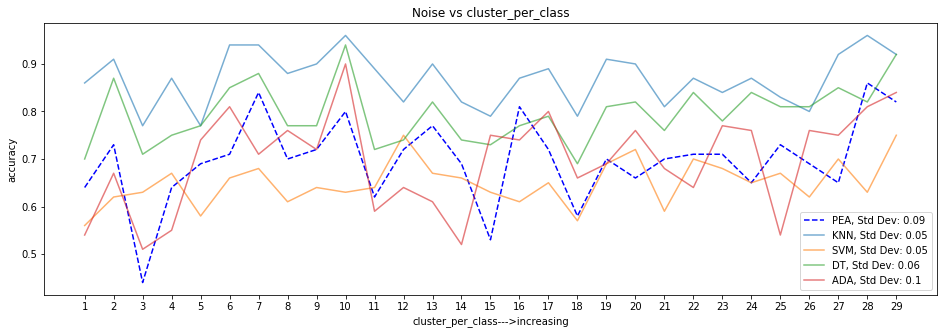

In [243]:
plt.figure(figsize=(16,5))
plt.plot(list_cps,x,'b--',label='PEA, Std Dev: '+str(np.round(np.std(x),2)))
plt.plot(list_cps,y,label='KNN, Std Dev: '+str(np.round(np.std(y),2)), alpha = 0.6)
plt.plot(list_cps,z,label='SVM, Std Dev: '+str(np.round(np.std(z),2)), alpha = 0.6)
plt.plot(list_cps,m,label='DT, Std Dev: '+str(np.round(np.std(m),2)), alpha = 0.6)
plt.plot(list_cps,n,label='ADA, Std Dev: '+str(np.round(np.std(n),2)), alpha = 0.6)
plt.xticks(ticks=list_cps);
plt.title('Noise vs cluster_per_class')
plt.xlabel('cluster_per_class--->increasing')
plt.ylabel('accuracy')
plt.legend(loc='best')

In [17]:
classifier_list = [
     PerformanceEnrichmentAnalysisClassifier(
        number_of_clusters=20, permutations=100),
     KNeighborsClassifier(3),
     SVC(kernel="linear", C=0.025),
     # SVC(gamma=2, C=1),
     DecisionTreeClassifier(max_depth=5),
     # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
     # MLPClassifier(alpha=0.01),
     AdaBoostClassifier(),
     # GaussianNB(),
     # QuadraticDiscriminantAnalysis()
]

def get_accuracies(classifier_list, metric, class_sep=None, noise=None, cluster_per_class=None):

    default_class_separator = 0
    default_noise = 0
    def_cluster_per_class = 1
    pea_list_accuracies = []
    ml_list_accuracies = []
    svm_list_accuracies = []
    dt_list_accuracies = []
    ada_list_accuracies = []
    
    if class_sep is None:
        class_separator = default_class_separator
    else:
        class_separator = class_sep

    if noise is None:
        flip_y = default_noise
    else:
        flip_y = noise
        
    if cluster_per_class is None:
        number_clusters_per_class = def_cluster_per_class
    else:
        number_clusters_per_class = cluster_per_class
    
    # Default Feature arguments
    number_of_samples = 1000
    number_of_features = 26
    number_informative_features = 5
    number_redundant_features = 21
    number_repeated_features = 0
    number_classes = 3
    number_clusters_per_class = 1

    # Variable arguments
    weights = [0.64, 0.34, 0.02]

    X_train, X_test, y_train, y_test = helper_data_generator.get_make_classification_data(
                                                number_of_samples,
                                                number_of_features,
                                                number_informative_features,
                                                number_redundant_features,
                                                number_repeated_features,
                                                number_classes,
                                                number_clusters_per_class,
                                                class_separator,
                                                flip_y,
                                                weights)
    
    X_train, X_test = helper_data_generator.get_scaled_data(X_train, X_test)
    pea_list_accuracies = helper_data_generator.train_test_classifier_print_results(classifier_list[0], pea_list_accuracies, metric, X_train, X_test, y_train, y_test)
    knn_list_accuracies = helper_data_generator.train_test_classifier_print_results(classifier_list[1], ml_list_accuracies, metric, X_train, X_test, y_train, y_test)
    svm_list_accuracies = helper_data_generator.train_test_classifier_print_results(classifier_list[2], svm_list_accuracies, metric, X_train, X_test, y_train, y_test)
    dt_list_accuracies = helper_data_generator.train_test_classifier_print_results(classifier_list[3], dt_list_accuracies, metric, X_train, X_test, y_train, y_test)
    ada_list_accuracies = helper_data_generator.train_test_classifier_print_results(classifier_list[4], ada_list_accuracies, metric, X_train, X_test, y_train, y_test)
    
    return pea_list_accuracies[0], ml_list_accuracies[0], svm_list_accuracies[0], dt_list_accuracies[0], ada_list_accuracies[0]

In [413]:
# Metric: accuracy, f1_score, precision, recall, roc_auc

In [18]:
list_noise_vals = list(np.round(np.arange(0,3,0.1),2))
list_1 = [get_accuracies(classifier_list, metric = 'precision',noise = noise_level) for noise_level in list_noise_vals]
x, y, z, m, n = np.array(list_1).T

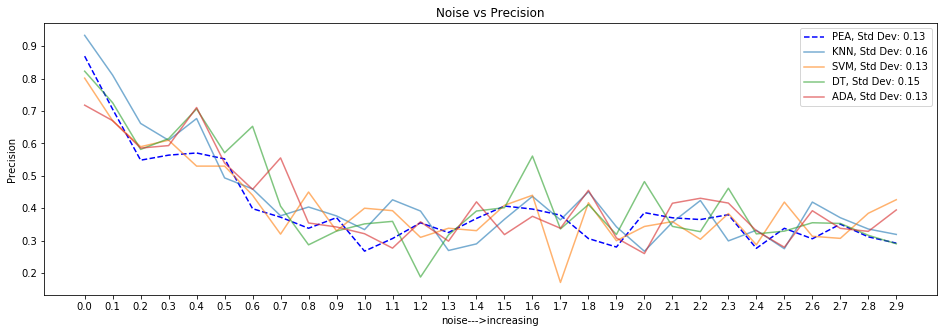

In [19]:
plt.figure(figsize=(16,5))
plt.plot(list_noise_vals,x,'b--',label='PEA, Std Dev: '+str(np.round(np.std(x),2)))
plt.plot(list_noise_vals,y,label='KNN, Std Dev: '+str(np.round(np.std(y),2)), alpha = 0.6)
plt.plot(list_noise_vals,z,label='SVM, Std Dev: '+str(np.round(np.std(z),2)), alpha = 0.6)
plt.plot(list_noise_vals,m,label='DT, Std Dev: '+str(np.round(np.std(m),2)), alpha = 0.6)
plt.plot(list_noise_vals,n,label='ADA, Std Dev: '+str(np.round(np.std(n),2)), alpha = 0.6)
plt.xticks(ticks=list_noise_vals);
plt.title('Noise vs Precision')
plt.xlabel('noise--->increasing')
plt.ylabel('Precision')
plt.legend(loc='best')

In [5]:
list_noise_vals = list(np.round(np.arange(0,2.9,0.1),2))
list_1 = [get_accuracies(classifier_list, metric = 'recall',noise = noise_level) for noise_level in list_noise_vals]
x, y, z, m, n = np.array(list_1).T

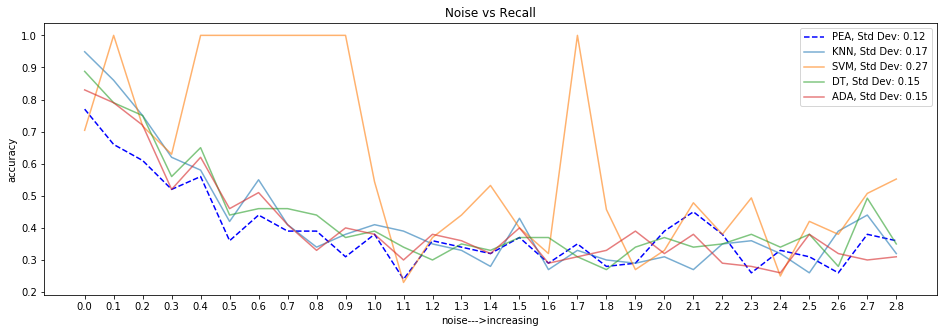

In [6]:
plt.figure(figsize=(16,5))
plt.plot(list_noise_vals,x,'b--',label='PEA, Std Dev: '+str(np.round(np.std(x),2)))
plt.plot(list_noise_vals,y,label='KNN, Std Dev: '+str(np.round(np.std(y),2)), alpha = 0.6)
plt.plot(list_noise_vals,z,label='SVM, Std Dev: '+str(np.round(np.std(z),2)), alpha = 0.6)
plt.plot(list_noise_vals,m,label='DT, Std Dev: '+str(np.round(np.std(m),2)), alpha = 0.6)
plt.plot(list_noise_vals,n,label='ADA, Std Dev: '+str(np.round(np.std(n),2)), alpha = 0.6)
plt.xticks(ticks=list_noise_vals);
plt.title('Noise vs Recall')
plt.xlabel('noise--->increasing')
plt.ylabel('recall')
plt.legend(loc='best')

In [5]:
# F1 score is usually not conidered for imbalanced data
list_noise_vals = list(np.round(np.arange(0,2.9,0.1),2))
list_1 = [get_accuracies(classifier_list, metric = 'f1_score',noise = noise_level) for noise_level in list_noise_vals]
x, y, z, m, n = np.array(list_1).T

TypeError: get_accuracies() got an unexpected keyword argument 'metric'

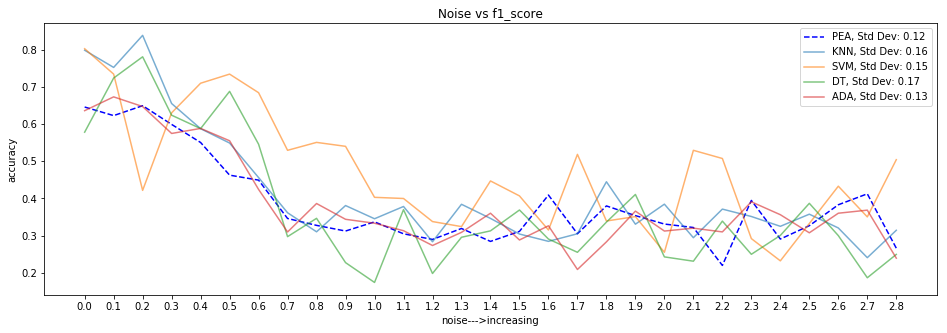

In [9]:
plt.figure(figsize=(16,5))
plt.plot(list_noise_vals,x,'b--',label='PEA, Std Dev: '+str(np.round(np.std(x),2)))
plt.plot(list_noise_vals,y,label='KNN, Std Dev: '+str(np.round(np.std(y),2)), alpha = 0.6)
plt.plot(list_noise_vals,z,label='SVM, Std Dev: '+str(np.round(np.std(z),2)), alpha = 0.6)
plt.plot(list_noise_vals,m,label='DT, Std Dev: '+str(np.round(np.std(m),2)), alpha = 0.6)
plt.plot(list_noise_vals,n,label='ADA, Std Dev: '+str(np.round(np.std(n),2)), alpha = 0.6)
plt.xticks(ticks=list_noise_vals);
plt.title('Noise vs f1_score')
plt.xlabel('noise--->increasing')
plt.ylabel('f1_score')
plt.legend(loc='best')

In [4]:
# F1 score is usually not conidered for imbalanced data
list_noise_vals = list(np.round(np.arange(0,2.9,0.1),2))
list_1 = [get_accuracies(classifier_list, metric = 'roc_auc',noise = noise_level) for noise_level in list_noise_vals]
x, y, z, m, n = np.array(list_1).T

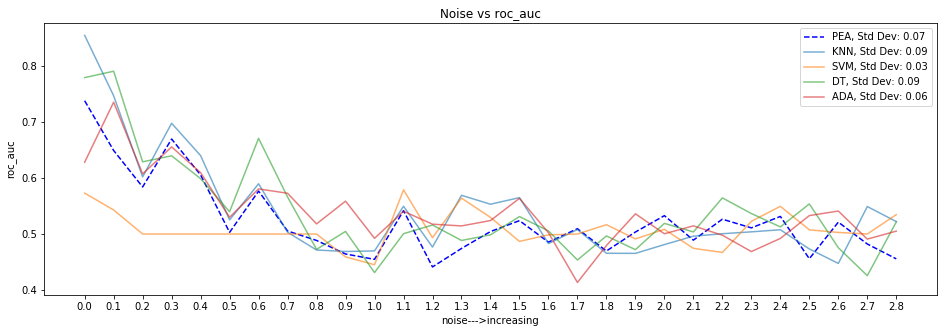

In [6]:
plt.figure(figsize=(16,5))
plt.plot(list_noise_vals,x,'b--',label='PEA, Std Dev: '+str(np.round(np.std(x),2)))
plt.plot(list_noise_vals,y,label='KNN, Std Dev: '+str(np.round(np.std(y),2)), alpha = 0.6)
plt.plot(list_noise_vals,z,label='SVM, Std Dev: '+str(np.round(np.std(z),2)), alpha = 0.6)
plt.plot(list_noise_vals,m,label='DT, Std Dev: '+str(np.round(np.std(m),2)), alpha = 0.6)
plt.plot(list_noise_vals,n,label='ADA, Std Dev: '+str(np.round(np.std(n),2)), alpha = 0.6)
plt.xticks(ticks=list_noise_vals);
plt.title('Noise vs roc_auc')
plt.xlabel('noise--->increasing')
plt.ylabel('roc_auc')
plt.legend(loc='best')

In [12]:
def plot(range_param,param,x,y,z,m,n):
    plt.figure(figsize=(16,5))
    plt.plot(range_param,x,'b--',label='PEA, Std Dev: '+str(np.round(np.std(x),2)))
    plt.plot(range_param,y,label='KNN, Std Dev: '+str(np.round(np.std(y),2)), alpha = 0.6)
    plt.plot(range_param,z,label='SVM, Std Dev: '+str(np.round(np.std(z),2)), alpha = 0.6)
    plt.plot(range_param,m,label='DT, Std Dev: '+str(np.round(np.std(m),2)), alpha = 0.6)
    plt.plot(range_param,n,label='ADA, Std Dev: '+str(np.round(np.std(n),2)), alpha = 0.6)
    plt.xticks(ticks=range_param);
    plt.title('Noise vs '+str(param))
    plt.xlabel('noise--->increasing')
    plt.ylabel(str(param))
    plt.legend(loc='best')

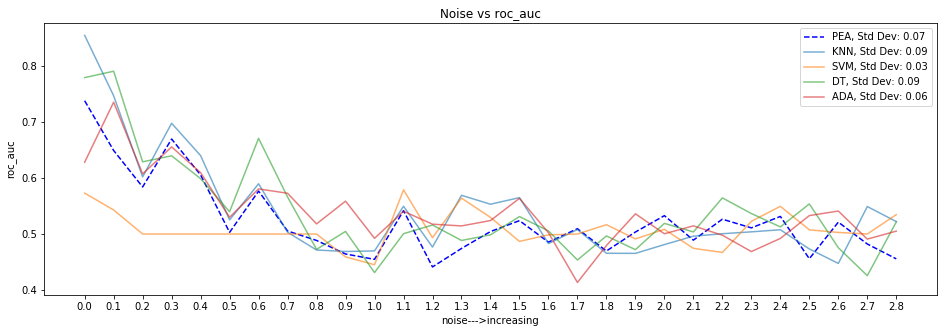

In [13]:
plot(list_noise_vals,'roc_auc',x,y,z,m,n)

In [6]:
clf_list = [
     PerformanceEnrichmentAnalysisClassifier(
        number_of_clusters=20, permutations=100),
     KNeighborsClassifier(3),
     # SVC(kernel="linear", C=0.025),
     # SVC(gamma=2, C=1),
     DecisionTreeClassifier(max_depth=5),
     # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
     # MLPClassifier(alpha=0.01),
     AdaBoostClassifier(),
     GaussianNB(),
     # QuadraticDiscriminantAnalysis()
]

In [177]:
def get_accuracies(classifier_list, metric, class_sep=None, noise=None, cluster_per_class=None):
    
    default_class_separator = 0
    default_noise = 0
    def_cluster_per_class = 1
    pea_list_accuracies = []
    ml_list_accuracies = []
    svm_list_accuracies = []
    dt_list_accuracies = []
    ada_list_accuracies = []
    
    if class_sep is None:
        class_separator = default_class_separator
    else:
        class_separator = class_sep

    if noise is None:
        flip_y = default_noise
    else:
        flip_y = noise
        
    if cluster_per_class is None:
        number_clusters_per_class = def_cluster_per_class
    else:
        number_clusters_per_class = cluster_per_class
    
    
    # Default Feature arguments
    number_of_samples = 1000
    number_of_features = 26
    number_informative_features = 5
    number_redundant_features = 21
    number_repeated_features = 0
    number_classes = 3
    number_clusters_per_class = 1

    # Variable arguments
    weights = [0.64, 0.34, 0.02]

    X_train, X_test, y_train, y_test = helper_data_generator.get_make_classification_data(
                                                number_of_samples,
                                                number_of_features,
                                                number_informative_features,
                                                number_redundant_features,
                                                number_repeated_features,
                                                number_classes,
                                                number_clusters_per_class,
                                                class_separator,
                                                flip_y,
                                                weights)

    X_train, X_test = helper_data_generator.get_scaled_data(X_train, X_test)

    #listoflists = []
    
    listoflists = [[] for i in range(len(clf_list))]
    
    list_of_acc_clf = []
    
#     for i in range(len(clf_list)):
#         if isinstance(clf_list[i],PerformanceEnrichmentAnalysisClassifier):
#             name = 'PEA'
#             list_of_acc_clf.append(name+'_acc')
#         else:
#             list_of_acc_clf.append(str(clf_list[i]).split('(')[0]+'_acc')
            
    my_dict = {}
    
    for i in range(len(clf_list)):
        if isinstance(clf_list[i],PerformanceEnrichmentAnalysisClassifier):
            name = 'PEA'
            #list_of_acc_clf.append(name+'_acc')
            my_dict[name] = []
        else:
            my_dict[str(clf_list[i]).split('(')[0]] = []
    
    #print(my_dict.values())
    
    
    
    for clf in clf_list:
            #print(type(value))
            #print(str(clf).split('(')[0])
            #if my_dict[key] == str(clf).split('(')[0]:
        #print(my_dict[key])
        #print(helper_data_generator.train_test_classifier_print_results(clf, metric, X_train, X_test, y_train, y_test))
            #my_dict[key] = [helper_data_generator.train_test_classifier_print_results(clf, metric, X_train, X_test, y_train, y_test)]
    print('******')
    #print(my_dict)
#     for i in range(len(clf_list)):
#         if isinstance(clf_list[i],PerformanceEnrichmentAnalysisClassifier):
#             print(list_of_acc_clf[i])
#             list_of_acc_clf[i] = helper_data_generator.train_test_classifier_print_results(clf_list[i], metric, X_train, X_test, y_train, y_test)
#         else:
#             print(list_of_acc_clf[i])
#             list_of_acc_clf[i] = helper_data_generator.train_test_classifier_print_results(clf_list[i], metric, X_train, X_test, y_train, y_test)
    
    #print(list_of_acc_clf)
    
    #listoflists.append(helper_data_generator.train_test_classifier_print_results(clf_list[0], metric, X_train, X_test, y_train, y_test))
#     for i,clf in enumerate(clf_list):
#         if isinstance(clf_list[i],PerformanceEnrichmentAnalysisClassifier):
#             name = 'PEA'
#             listoflists[i] = helper_data_generator.train_test_classifier_print_results(clf_list[i], metric, X_train, X_test, y_train, y_test)
#         else:
#             pass
        
    return list_of_acc_clf

In [48]:
for i,clf in enumerate(clf_list):
    print(i,clf)

0 <PEA.PerformanceEnrichmentAnalysisClassifier object at 0x7fef6d5b8e50>
1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
2 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
3 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
4 GaussianNB(priors=None, var_smoothing=1e-09)


In [18]:
listoflists = [[] for i in range(len(clf_list))]

In [30]:
listoflists[:0]

[]

In [178]:
# F1 score is usually not conidered for imbalanced data
list_noise_vals = list(np.round(np.arange(0,1,0.1),2))
list_1 = [get_accuracies(clf_list, metric = 'accuracy',noise = noise_level) for noise_level in list_noise_vals]

0.7
0.91
0.82
0.75
0.82
******
0.65
0.81
0.8
0.78
0.8
******
0.58
0.68
0.69
0.68
0.59
******
0.59
0.64
0.66
0.65
0.7
******
0.59
0.67
0.65
0.65
0.57
******
0.61
0.52
0.6
0.49
0.44
******
0.55
0.44
0.53
0.51
0.54
******
0.46
0.39
0.46
0.45
0.44
******
0.4
0.41
0.41
0.4
0.4
******
0.43
0.3
0.36
0.34
0.4
******


In [ ]:
my_dict = {}

for key,value in my_dict.items():
    my_dict[key].add()

In [97]:
list_1

[[('PEA_acc', 0.42),
  ('KNeighborsClassifier_acc', 0.85),
  ('DecisionTreeClassifier_acc', 0.79),
  ('AdaBoostClassifier_acc', 0.72),
  ('GaussianNB_acc', 0.5)],
 [('PEA_acc', 0.65),
  ('KNeighborsClassifier_acc', 0.92),
  ('DecisionTreeClassifier_acc', 0.74),
  ('AdaBoostClassifier_acc', 0.74),
  ('GaussianNB_acc', 0.8)],
 [('PEA_acc', 0.73),
  ('KNeighborsClassifier_acc', 0.77),
  ('DecisionTreeClassifier_acc', 0.81),
  ('AdaBoostClassifier_acc', 0.71),
  ('GaussianNB_acc', 0.71)],
 [('PEA_acc', 0.74),
  ('KNeighborsClassifier_acc', 0.94),
  ('DecisionTreeClassifier_acc', 0.8),
  ('AdaBoostClassifier_acc', 0.82),
  ('GaussianNB_acc', 0.81)],
 [('PEA_acc', 0.69),
  ('KNeighborsClassifier_acc', 0.91),
  ('DecisionTreeClassifier_acc', 0.77),
  ('AdaBoostClassifier_acc', 0.73),
  ('GaussianNB_acc', 0.77)],
 [('PEA_acc', 0.62),
  ('KNeighborsClassifier_acc', 0.71),
  ('DecisionTreeClassifier_acc', 0.75),
  ('AdaBoostClassifier_acc', 0.75),
  ('GaussianNB_acc', 0.69)],
 [('PEA_acc', 0.73)

In [108]:
np.array(list_1).T[1][0].astype('float')

array([0.42, 0.65, 0.73, 0.74, 0.69, 0.62, 0.73, 0.82, 0.8 , 0.68, 0.6 ,
       0.59, 0.62, 0.69, 0.8 , 0.8 , 0.7 , 0.49, 0.68, 0.62, 0.78, 0.68,
       0.68, 0.69, 0.65, 0.61, 0.72, 0.75, 0.66, 0.65])

In [111]:
np.unique(np.array(list_1).T[0][0])[0]
np.hstack((np.array(list_1).T[1][0]).astype('float'))

array([0.42, 0.65, 0.73, 0.74, 0.69, 0.62, 0.73, 0.82, 0.8 , 0.68, 0.6 ,
       0.59, 0.62, 0.69, 0.8 , 0.8 , 0.7 , 0.49, 0.68, 0.62, 0.78, 0.68,
       0.68, 0.69, 0.65, 0.61, 0.72, 0.75, 0.66, 0.65])

In [112]:
dict_items= {}

for i in range(np.array(list_1).shape[1]):
    #print(np.unique(np.array(list_1).T[0][i])[0])
    #print(np.hstack((np.array(list_1).T[1][i])))
    dict_items[np.unique(np.array(list_1).T[0][i])[0]] = np.hstack((np.array(list_1).T[1][i]).astype('float'))
    #dict_items[np.unique(np.array(list_1).T[0][i])[0]] = np.array(list_1).T[1][0].astype('float')
    
for key, value in dict_items.items():
    print(key,':',value)

PEA_acc : [0.42 0.65 0.73 0.74 0.69 0.62 0.73 0.82 0.8  0.68 0.6  0.59 0.62 0.69
 0.8  0.8  0.7  0.49 0.68 0.62 0.78 0.68 0.68 0.69 0.65 0.61 0.72 0.75
 0.66 0.65]
KNeighborsClassifier_acc : [0.85 0.92 0.77 0.94 0.91 0.71 0.88 0.96 0.94 0.94 0.8  0.78 0.83 0.88
 0.97 0.89 0.94 0.75 0.87 0.83 0.94 0.94 0.87 0.85 0.78 0.81 0.88 0.88
 0.82 0.8 ]
DecisionTreeClassifier_acc : [0.79 0.74 0.81 0.8  0.77 0.75 0.84 0.88 0.8  0.74 0.78 0.73 0.76 0.75
 0.82 0.72 0.8  0.71 0.82 0.77 0.78 0.83 0.78 0.8  0.74 0.76 0.87 0.85
 0.76 0.74]
AdaBoostClassifier_acc : [0.72 0.74 0.71 0.82 0.73 0.75 0.74 0.73 0.65 0.63 0.71 0.74 0.73 0.7
 0.85 0.62 0.77 0.58 0.67 0.75 0.75 0.82 0.62 0.74 0.68 0.54 0.8  0.84
 0.71 0.57]
GaussianNB_acc : [0.5  0.8  0.71 0.81 0.77 0.69 0.82 0.83 0.84 0.75 0.65 0.69 0.7  0.58
 0.92 0.73 0.9  0.66 0.7  0.73 0.82 0.83 0.69 0.79 0.7  0.63 0.8  0.88
 0.83 0.83]


In [113]:
def plot(range_param,param,dict_items):
    
    plt.figure(figsize=(16,5))
    
    for key, value in dict_items.items():
        plt.plot(range_param,value,label= str(key)+', Std Dev: '+str(np.round(np.std(value),2)), alpha = 0.6)
    
#     for i in range(len(dict_items):
#         plt.plot(range_param,x,'b--',label='PEA, Std Dev: '+str(np.round(np.std(x),2)))
#         plt.plot(range_param,y,label='KNN, Std Dev: '+str(np.round(np.std(y),2)), alpha = 0.6)
#         plt.plot(range_param,z,label='SVM, Std Dev: '+str(np.round(np.std(z),2)), alpha = 0.6)
#         plt.plot(range_param,m,label='DT, Std Dev: '+str(np.round(np.std(m),2)), alpha = 0.6)
#         plt.plot(range_param,n,label='ADA, Std Dev: '+str(np.round(np.std(n),2)), alpha = 0.6)
    
    plt.xticks(ticks=range_param);
    plt.title('Noise vs '+str(param))
    plt.xlabel('noise--->increasing')
    plt.ylabel(str(param))
    plt.legend(loc='best')

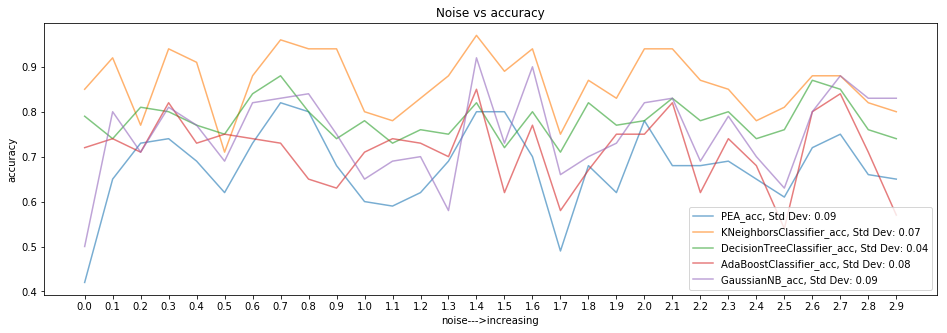

In [114]:
plot(list_noise_vals,'accuracy',dict_items)

In [149]:
# list_dyn_classifiers = []
# for i in range(len(classifier_list)):
#     #print('classifier_list_'+str(i))
#     list_dyn_classifiers.append('classifier_list_'+str(i))
    
# my_list = {}
# for abc in list_dyn_classifiers:
#     #print(abc.replace('_',','))
#     print(abc)
#     my_list[abc] = []
    
# # list_dyn_classifiers = []
# mylist = {}

# # for i in range(len(classifier_list)-1):
# #     #print('classifier_list_'+str(i))
# #     list_dyn_classifiers.append('classifier_list_'+str(i))
    
# for clf in classifier_list:
#     if isinstance(clf,PerformanceEnrichmentAnalysisClassifier):
#         #print('PerformanceEnrichmentAnalysisClassifier')
#         mylist['PEA'] = []

# for clf in classifier_list[1:]:
#     #print(str(clf).split('(')[0])
#     mylist[str(clf).split('(')[0]] = []

In [150]:
def make_classifier_data_accuracies(classifier_list, metric, class_sep=None, noise=None, cluster_per_class=None):
    default_class_separator = 0
    default_noise = 0
    def_cluster_per_class = 1
    pea_list_accuracies = []
    ml_list_accuracies = []
    svm_list_accuracies = []
    dt_list_accuracies = []
    ada_list_accuracies = []
    
    if class_sep is None:
        class_separator = default_class_separator
    else:
        class_separator = class_sep

    if noise is None:
        flip_y = default_noise
    else:
        flip_y = noise
        
    if cluster_per_class is None:
        number_clusters_per_class = def_cluster_per_class
    else:
        number_clusters_per_class = cluster_per_class
    
    # Default Feature arguments
    number_of_samples = 1000
    number_of_features = 26
    number_informative_features = 5
    number_redundant_features = 21
    number_repeated_features = 0
    number_classes = 3
    number_clusters_per_class = 1

    # Variable arguments
    weights = [0.64, 0.34, 0.02]

    X_train, X_test, y_train, y_test = helper_data_generator.get_make_classification_data(
                                                number_of_samples,
                                                number_of_features,
                                                number_informative_features,
                                                number_redundant_features,
                                                number_repeated_features,
                                                number_classes,
                                                number_clusters_per_class,
                                                class_separator,
                                                flip_y,
                                                weights)

    X_train, X_test = helper_data_generator.get_scaled_data(X_train, X_test)

    list_lists_clf_accuracies = []
    list_lists_clf = []
    
    # Create a list of lists of accuracies
    for i in range(len(clf_list)):
        list_lists_clf.append('list'+str(i))
    
    # Instantiate each list
    for i in range(len(list_lists_clf)):
        list_lists_clf[i] = []
    
    for i in range(len(clf_list)):
        if isinstance(clf_list[i],PerformanceEnrichmentAnalysisClassifier):
            name = 'PEA'
            list_lists_clf_accuracies.append((name, helper_data_generator.train_test_classifier_print_results(clf_list[i], list_lists_clf[i], metric, X_train, X_test, y_train, y_test)))
        else:
            list_lists_clf_accuracies.append((str(clf_list[i]).split('(')[0], helper_data_generator.train_test_classifier_print_results(clf_list[i], list_lists_clf[i], metric, X_train, X_test, y_train, y_test)))
        
    return list_lists_clf_accuracies

In [142]:
# # params: noise, class_sep, cluster_per_class
# def param_metric_plot(metric_performance, start, end, step, param):
#     dict_params = {}
#     dict_params[str('list')+param+str('vals')] = list(np.round(np.arange(start,end,step),2))
#     # list_1 = [get_accuracies(clf_list, metric = metric_performance, param = num) for num in list_param_vals]
#     for key,value in dict_params.items():
#         list_1 = []
#         #print(type(value))
#         if param == 'noise':
#             for num in value:
#                 list_1.append(get_accuracies(clf_list, metric = metric_performance, noise = num))
#             #list_1 = [get_accuracies(clf_list, metric = metric_performance, noise = num) for num in value]
#         elif param == 'class_sep':
#             list_1 = [get_accuracies(clf_list, metric = metric_performance, class_sep = num) for num in value]
#         elif param == 'cluster_per_class':
#             list_1 = [get_accuracies(clf_list, metric = metric_performance, cluster_per_class = num) for num in value]
#         print(list_1)

In [143]:
# list_1 = param_metric_plot('accuracy', 0, 0.3, 0.1, 'noise')

<class 'list'>
[[('PEA', [0.73]), ('KNeighborsClassifier', [0.86]), ('DecisionTreeClassifier', [0.76]), ('AdaBoostClassifier', [0.67]), ('GaussianNB', [0.73])], [('PEA', [0.7]), ('KNeighborsClassifier', [0.79]), ('DecisionTreeClassifier', [0.67]), ('AdaBoostClassifier', [0.72]), ('GaussianNB', [0.71])], [('PEA', [0.58]), ('KNeighborsClassifier', [0.8]), ('DecisionTreeClassifier', [0.7]), ('AdaBoostClassifier', [0.75]), ('GaussianNB', [0.74])]]


In [ ]:
# F1 score is usually not conidered for imbalanced data
# params: noise, class_sep, cluster_per_class
# Metric: accuracy, f1_score, precision, recall, roc_auc

metric_classifier = 'precision'


list_values = list(np.round(np.arange(0,0.5,0.1),2))
list_accuracies = [helper_data_generator.make_classifier_data_accuracies(clf_list, 
                                                                metric = metric_classifier,
                                                                noise = level) 
                   for level in list_values]

dict_items= {}
for i in range(np.array(list_accuracies).shape[1]):
    dict_items[np.unique(np.array(list_accuracies).T[0][i])[0]] = np.hstack((np.array(list_accuracies).T[1][i]))
    
helper_data_generator.plot_class_sep(list_values,metric_classifier,dict_items)

In [ ]:

def plot_noise(range_param,param,dict_items):
    
    plt.figure(figsize=(16,5))
    
    for key, value in dict_items.items():
        if key=='PEA':
            plt.plot(range_param,value,'b--',label= str(key)+', Std Dev: '+str(np.round(np.std(value),2)))
        else:
            plt.plot(range_param,value,label= str(key)+', Std Dev: '+str(np.round(np.std(value),2)), alpha = 0.6)
    
    plt.xticks(ticks=range_param);
    plt.title('Noise vs '+str(param))
    plt.xlabel('noise--->increasing')
    plt.ylabel(str(param))
    plt.legend(loc='best')
    
def plot_class_sep(range_param,param,dict_items):
    
    plt.figure(figsize=(16,5))
    
    for key, value in dict_items.items():
        if key=='PEA':
            plt.plot(range_param,value,'b--',label= str(key)+', Std Dev: '+str(np.round(np.std(value),2)))
        else:
            plt.plot(range_param,value,label= str(key)+', Std Dev: '+str(np.round(np.std(value),2)), alpha = 0.6)
    
    plt.xticks(ticks=range_param);
    plt.title('Class Separator vs '+str(param))
    plt.xlabel('Class Separator ---> increasing')
    plt.ylabel(str(param))
    plt.legend(loc='best')
    
def plot_cluster_per_class(range_param,param,dict_items):
    
    plt.figure(figsize=(16,5))
    
    for key, value in dict_items.items():
        if key=='PEA':
            plt.plot(range_param,value,'b--',label= str(key)+', Std Dev: '+str(np.round(np.std(value),2)))
        else:
            plt.plot(range_param,value,label= str(key)+', Std Dev: '+str(np.round(np.std(value),2)), alpha = 0.6)
    
    plt.xticks(ticks=range_param);
    plt.title('Number of clusters per class vs '+str(param))
    plt.xlabel('Number of clusters per class ---> increasing')
    plt.ylabel(str(param))
    plt.legend(loc='best')

In [2]:
def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
        for rect in ax.patches:
            # Get X and Y placement of label from rect.
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2

            # Number of points between bar and label. Change to your liking.
            space = spacing
            # Vertical alignment for positive values
            va = 'bottom'

            # If value of bar is negative: Place label below bar
            if y_value < 0:
                # Invert space to place label below
                space *= -1
                # Vertically align label at top
                va = 'top'

            # Use Y value as label and format number with one decimal place
            label = "{:.3f}".format(y_value)

            # Create annotation
            ax.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(0, space),          # Vertically shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                ha='center',                # Horizontally center label
                va=va,
                fontsize=8)                      # Vertically align label differently for
                                            # positive and negative values.



In [3]:
# Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split, KFold, cross_validate
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
from sklearn.model_selection import StratifiedKFold, KFold, StratifiedShuffleSplit
from sklearn.utils import shuffle
from collections import defaultdict, OrderedDict

# Helper file
import helper_data_generator

# Models
from PEA import PerformanceEnrichmentAnalysisClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.dummy import DummyClassifier

# Metric
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, precision_score, \
recall_score, SCORERS, roc_auc_score, roc_curve, auc, precision_recall_curve

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
classifier_list = [
     PerformanceEnrichmentAnalysisClassifier(
        number_of_clusters=20, permutations=100),
     KNeighborsClassifier(3),
     DummyClassifier(strategy='uniform'),
     DummyClassifier(strategy='most_frequent'),
     # SVC(kernel="linear", C=0.025),
     # SVC(gamma=2, C=1),
     #DecisionTreeClassifier(max_depth=5),
     # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
     # MLPClassifier(alpha=0.01),
     AdaBoostClassifier(),
     #GaussianNB(),
     # QuadraticDiscriminantAnalysis()
]

In [12]:
    
def plot_bar_classwise(x, y, col_noise, metric, class_label):
    # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    # https://blog.finxter.com/matplotlib-legend/

    df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
    display(df_1)
    ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
    ax.set_yticks(np.arange(0,1.1,0.1))
    ax.minorticks_on()
    ax.set_ylim(0,2)
    ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
    #ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
    ax.set_facecolor('white')
    ax.set_ylabel(str(metric),fontsize=18)
    ax.set_title('Noise vs '+str(metric)+'_class_'+class_label,fontsize=18)
    #display(df_1.mean()[3])
    # facecolor='grey',
    ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),3)[0]) +'& SD = '+str(round(df_1.std(),3)[0]),
               'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),3)[1]) +'& SD = '+str(round(df_1.std(),3)[1]),
               'DummyClassifier-Uniform : Mean = '+ str(round(df_1.mean(),3)[2]) +'& SD = '+str(round(df_1.std(),3)[2]),
               'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),3)[3]) +'& SD = '+str(round(df_1.std(),3)[3]),
               'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),3)[4]) +'& SD = '+str(round(df_1.std(),3)[4])],
               fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title= str(metric)+'_class_'+class_label+' - Central Tendency', title_fontsize=14, borderpad=.9)

    # legend = ax.legend()
    # frame = legend.get_frame()
    # frame.set_color('grey')

    labels = list(round(df_1.std(),3))
    add_value_labels(ax)

In [6]:
def noise_classwise(clf, metric, class_label, folds):
    
    list_of_class_sensitivity = []
    list_values = list(np.round(np.arange(0, 1, 0.2),2))
    
    for noise in list_values:
        list_temp_A = []
        list_temp_B = []
        list_temp_C = []
        X, y = helper_data_generator.make_classification(n_samples=5000,
                                       n_features=26,
                                       n_informative=21,
                                       n_redundant=5,
                                       n_repeated=0,
                                       n_classes=3,
                                       n_clusters_per_class=1,
                                       class_sep=0.9,
                                       flip_y=noise,
                                       weights=[0.65, 0.01, 0.34])
        
#         column_size = X.shape[1]
#         cols = [x + str(i) for x, i in zip(["col"]*column_size,
#                                                range(column_size))]

#         y = pd.DataFrame(y, columns=['label'])
#         y.index = np.arange(0, len(y))
#         y.index.name = 'index'

#         syn_df = pd.DataFrame(X, columns=cols)
#         syn_df.index = np.arange(0, len(syn_df))
#         syn_df.index.name = 'index'
#         syn_df = syn_df.merge(y, on='index')
        #display(syn_df)

        #skf = StratifiedKFold(n_splits=folds, shuffle=True)
        skf = StratifiedShuffleSplit(n_splits=folds, test_size=0.2)
        for train_index, test_index in skf.split(X, y):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            #display(len(np.unique(y_test)))
            n_classes = len(np.unique(y_test))
#         rkf = KFold(n_splits=folds)
#         for train, test in rkf.split(syn_df):
#             syn_df_train = syn_df.loc[train]
#             syn_df_test = syn_df.loc[test]
#             X_train = syn_df_train.loc[:, cols].reset_index(drop=True)
#             y_train = syn_df_train.loc[:, 'label'].reset_index(drop=True)
#             X_test = syn_df_test.loc[:, cols].reset_index(drop=True)
#             y_test = syn_df_test.loc[:, 'label'].reset_index(drop=True)
#             X_train, y_train = shuffle(X_train, y_train)
            #print(clf)
            clf.fit(X_train, y_train)
            prediction = clf.predict(X_test)
            
            if metric=='roc_auc_metric':
                y_test = label_binarize(y_test, classes=[0,1,2])
                prediction = label_binarize(prediction, classes=[0,1,2])
                fpr = dict()
                tpr = dict()
                roc_auc = dict()
                # https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], prediction[:, i])
                    roc_auc[i] = auc(fpr[i], tpr[i])
                #print('roc_auc_class: ',roc_auc)

                list_temp_A.append(roc_auc[0])
                list_temp_B.append(roc_auc[1])
                list_temp_C.append(roc_auc[2])
            elif metric=='precision_recall':
                y_test = label_binarize(y_test, classes=[0,1,2])
                prediction = label_binarize(prediction, classes=[0,1,2])
                precision = dict()
                recall = dict()
                pr_auc = dict()
                # https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
                for i in range(n_classes):
                    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], prediction[:, i])
                    pr_auc[i] = auc(recall[i], precision[i])
                #print('roc_auc_class: ',roc_auc)

                list_temp_A.append(pr_auc[0])
                list_temp_B.append(pr_auc[1])
                list_temp_C.append(pr_auc[2])
            else:
                mcm = multilabel_confusion_matrix(y_test, prediction, labels=[0,1,2])
                tn = mcm[:, 0, 0]
                tp = mcm[:, 1, 1]
                fn = mcm[:, 1, 0]
                fp = mcm[:, 0, 1]
                if metric=='fnr':
                    fnr_class_A = (fn / (fn + tp))[0]
                    fnr_class_B = (fn / (fn + tp))[1]
                    fnr_class_C = (fn / (fn + tp))[2]
                    list_temp_A.append(fnr_class_A)
                    list_temp_B.append(fnr_class_B)
                    list_temp_C.append(fnr_class_C)
                elif metric=='fpr':
                    fpr_class_A = (fp / (tn + fp))[0]
                    fpr_class_B = (fp / (tn + fp))[1]
                    fpr_class_C = (fp / (tn + fp))[2]
                    list_temp_A.append(fpr_class_A)
                    list_temp_B.append(fpr_class_B)
                    list_temp_C.append(fpr_class_C)
                elif metric=='sensitivity':
                    sensitivity_recall_tpr_class_A = (tp / (tp + fn))[0]
                    sensitivity_recall_tpr_class_B = (tp / (tp + fn))[1]
                    sensitivity_recall_tpr_class_C = (tp / (tp + fn))[2]
                    list_temp_A.append(sensitivity_recall_tpr_class_A)
                    list_temp_B.append(sensitivity_recall_tpr_class_B)
                    list_temp_C.append(sensitivity_recall_tpr_class_C)
                elif metric=='specificity':
                    speificity_neg_recall_tnr_class_A = (tn / (tn + fp))[0]
                    speificity_neg_recall_tnr_class_B = (tn / (tn + fp))[1]
                    speificity_neg_recall_tnr_class_C = (tn / (tn + fp))[2]
                    list_temp_A.append(speificity_neg_recall_tnr_class_A)
                    list_temp_B.append(speificity_neg_recall_tnr_class_B)
                    list_temp_C.append(speificity_neg_recall_tnr_class_C)
                
        list_of_class_sensitivity.append((np.mean(list_temp_A),np.mean(list_temp_B),np.mean(list_temp_C)))
    
    if class_label=='0':
        return list(np.round(list_of_class_sensitivity,3)[:,0]) # class A or -1
    elif class_label=='1':
        return list(np.round(list_of_class_sensitivity,3)[:,1]) # class A or -1
    elif class_label=='2':
        return list(np.round(list_of_class_sensitivity,3)[:,2]) # class A or -1


In [7]:
def create_dataframe_classwise(dict_items, class_label, metric):
    
    list_lists_clf = []

    for i in range(5):
        list_lists_clf.append('list'+str(i))

    for i in range(5):
        list_lists_clf[i] = []

    for i in range(5):
        for key, value in dict_items.items():
            #print(key, value)
            list_lists_clf[i].append((key,value[0][i]))
        #print(len(value))
        #print(np.array(dict_items['SVC'].T).reshape(-1,1))

    #print(list_lists_clf)

    list_lists_clf = np.array(list_lists_clf)
    a = list_lists_clf.T[0].reshape(1,-1)
    a = a[0]

    _, idx = np.unique(a, return_index=True)
    x = a[np.sort(idx)]

    list_noise_vals = list(np.round(np.arange(0, 1, 0.2),2))
    list_noise_vals = np.array(list_noise_vals)

    y = list_lists_clf.T[1]

    col_noise = []
    for i in list_noise_vals:
        col_noise.append(('noise_'+str(i)))
        
    plot_bar_classwise(x, y, col_noise, metric, class_label)



In [45]:
    
# def create_dict_clf_noise_classwise(classifier_list, metric, class_label, folds):
    
#     list_lists_clf = []
#     list_lists_clf_metric = []

#     for i in range(len(classifier_list)):
#         list_lists_clf.append('list'+str(i))

#     for i in range(len(list_lists_clf)):
#         list_lists_clf[i] = []
    
#     for i in range(len(classifier_list)):
#         if isinstance(classifier_list[i],PerformanceEnrichmentAnalysisClassifier):
#             name = 'PEA'
#             list_lists_clf_metric.append((name,noise_classwise(classifier_list[i], metric, class_label, folds)))
#         elif isinstance(classifier_list[i],DummyClassifier):
#             if classifier_list[i].strategy=='uniform':
#                 display(classifier_list[i])
#                 list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0]+'_uniform',noise_classwise(classifier_list[i], metric, class_label, folds)))
#             elif classifier_list[i].strategy=='most_frequent':
#                 display(classifier_list[i])
#                 list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0]+'_most_frequent',noise_classwise(classifier_list[i], metric, class_label, folds)))
#         else:
#             list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0],noise_classwise(classifier_list[i], metric, class_label, folds)))
#             #list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0],noise(classifier_list[i], metric, folds)))
    
#     dict_items= {}

#     for i in range(np.array(list_lists_clf_metric).shape[0]):
#         dict_items[np.unique(np.array(list_lists_clf_metric).T[0][i])[0]] = np.hstack((np.array(list_lists_clf_metric).T[1][i]))
    
#     display(dict_items)
    
#     create_dataframe_classwise(dict_items, class_label, metric)



In [8]:
    
def create_dict_clf_noise_classwise(classifier_list, metric, class_label, folds):
    
    #list_lists_clf = []
    
    #list_lists_clf_metric = []
    list_classifiers = defaultdict(list)

    #for i in range(len(classifier_list)):
        #list_lists_clf.append('list'+str(i))
    
    #display(list_lists_clf)
    
    #for i in range(len(list_lists_clf)):
        #list_lists_clf[i] = []
    
    #print(metric)
    for i in range(len(classifier_list)):
        if isinstance(classifier_list[i],PerformanceEnrichmentAnalysisClassifier):
            name = 'PEA'
            #list_lists_clf_metric.append((name,noise_classwise(classifier_list[i], metric, class_label, folds)))
            list_classifiers[name].append(noise_classwise(classifier_list[i], metric, class_label, folds))
        elif isinstance(classifier_list[i],DummyClassifier):
            if classifier_list[i].strategy=='uniform':
                display(classifier_list[i])
                #list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0]+'_uniform',noise_classwise(classifier_list[i], metric, class_label, folds)))
                list_classifiers[str(classifier_list[i]).split('(')[0]+'_uniform'].append(noise_classwise(classifier_list[i], metric, class_label, folds))
            elif classifier_list[i].strategy=='most_frequent':
                display(classifier_list[i])
                #list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0]+'_most_frequent',noise_classwise(classifier_list[i], metric, class_label, folds)))
                list_classifiers[str(classifier_list[i]).split('(')[0]+'most_frequent'].append(noise_classwise(classifier_list[i], metric, class_label, folds))
        else:
            list_classifiers[str(classifier_list[i]).split('(')[0]].append(noise_classwise(classifier_list[i], metric, class_label, folds))
            #list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0],noise_classwise(classifier_list[i], metric, class_label, folds)))
            
    display(list_classifiers)
    
#     dict_items= {}

#     for i in range(np.array(list_lists_clf_metric).shape[0]):
#         dict_items[np.unique(np.array(list_lists_clf_metric).T[0][i])[0]] = np.hstack((np.array(list_lists_clf_metric).T[1][i]))

    create_dataframe_classwise(list_classifiers, class_label, metric)




In [21]:
create_dict_clf_noise_classwise(classifier_list, 'specificity', '1', 2)

DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

defaultdict(list,
            {'PEA': [[0.973, 0.986, 0.938, 0.933, 0.798]],
             'KNeighborsClassifier': [[0.999, 0.983, 0.956, 0.882, 0.83]],
             'DummyClassifier_uniform': [[0.67, 0.686, 0.661, 0.66, 0.648]],
             'DummyClassifiermost_frequent': [[1.0, 1.0, 1.0, 1.0, 1.0]],
             'AdaBoostClassifier': [[0.998, 0.995, 0.993, 0.975, 0.907]]})

{'PEA': array([0.894, 1.   , 0.934, 0.89 , 0.835]),
 'KNeighborsClassifier': array([1.   , 0.982, 0.938, 0.887, 0.83 ]),
 'DummyClassifier_uniform': array([0.686, 0.689, 0.679, 0.659, 0.64 ]),
 'DummyClassifier_most_frequent': array([1., 1., 1., 1., 1.]),
 'AdaBoostClassifier': array([0.997, 0.998, 0.993, 0.981, 0.876])}

DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

defaultdict(list,
            {'PEA': [[0.888, 0.921, 0.951, 0.91, 0.774]],
             'KNeighborsClassifier': [[1.0, 0.986, 0.958, 0.901, 0.826]],
             'DummyClassifier_uniform': [[0.669, 0.667, 0.652, 0.674, 0.657]],
             'DummyClassifiermost_frequent': [[1.0, 1.0, 1.0, 1.0, 1.0]],
             'AdaBoostClassifier': [[0.994, 0.999, 0.989, 0.968, 0.894]]})

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifiermost_frequent,AdaBoostClassifier
noise_0.0,0.888,1.000,0.669,1.0,0.994
noise_0.2,0.921,0.986,0.667,1.0,0.999
noise_0.4,0.951,0.958,0.652,1.0,0.989
noise_0.6,0.910,0.901,0.674,1.0,0.968
noise_0.8,0.774,0.826,0.657,1.0,0.894


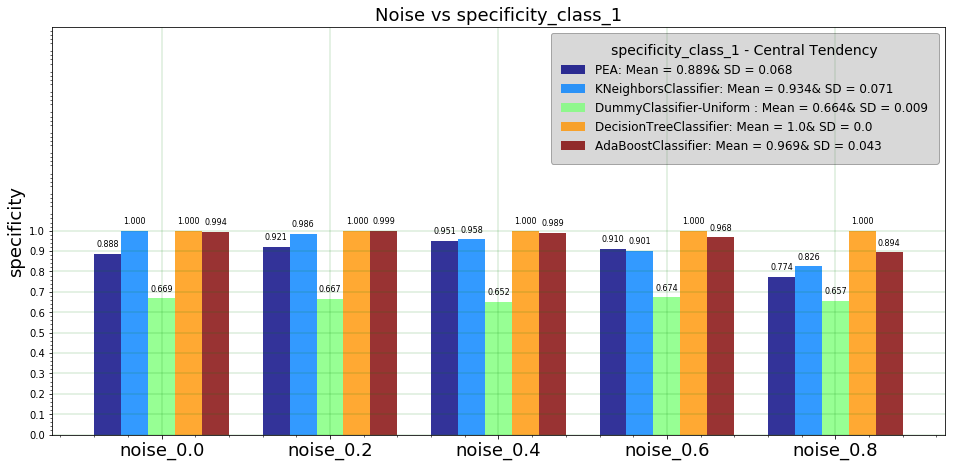

In [13]:
create_dict_clf_noise_classwise(classifier_list, 'specificity', '1', 5)

In [38]:
list_accuracies = defaultdict(list)
display(list_accuracies)
name='abc'
list_accuracies[name].append(1)
display(list_accuracies)


defaultdict(list, {})

defaultdict(list, {'abc': [1]})

[1]
